# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>
Luca Maria Colombo Gomez - Matr: 934049

The MD code provided starts the simulation from a provided spatial configuration of the N particles (file: config.0) and, once the simulation is finished, it writes out the final configuration (file: config.final) in the config folder.

The simulation is performed via a Lennard-Jones model. The system is first equilibrated fo 2000 time step, then the it evolve for 50000 time steps, and the physical quantities required are extracted and saved in the respective file, in the 'data' folder.

The input file, with the desired simulation parameters, can be given as inline argument to the program. If no input file is specified, the program search for a generic "input.dat" file in its directory.
The starting spatial configuration ( config.0 and old.0) is in the 'config' folder. Each phase has different starting configuration, obtained running the simulation one time from the initial config.0 provided, and saving the final config.



The files input.gas, input.liquid and input.solid contain the proper parameters for each of the three phases required, in reduced units, which are the same for both Argon and Krypton.

<table>
    <tr>
        <th style="text-align: center">Gas</th>
        <th style="text-align: center">Liquid</th>
        <th style="text-align: center">Solid</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>Particle density</td><td>0.05</td>
            </tr>
            <tr>
                <td>Temperature</td><td>1.2</td>
            </tr>
            <tr>
                <td>Cut-off radius</td><td>5.0</td>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>Particle density</td><td>0.8</td>
            </tr>
            <tr>
                <td>Temperature</td><td>1.1</td>
            </tr>
            <tr>
                <td>Cut-off radius</td><td>2.5</td>
            </tr>
            </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>Particle density</td><td>1.1</td>
            </tr>
            <tr>
                <td>Temperature</td><td>0.8</td>
            </tr>
            <tr>
                <td>Cut-off radius</td><td>2.2</td>
            </tr>
            </table></td>
    </tr>
</table>

Then there are the specific parameters for each element, used to convert the reduced units back to SI units.

<table>
    <tr>
        <th style="text-align: center">Argon</th>
        <th style="text-align: center">Krypton</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>$\sigma$</td><td>0.34 nm</td>
            </tr>
            <tr>
                <td>$\epsilon/k_\text{B}$</td><td>120 K</td>
            </tr>
            <tr>
                <td>m</td><td>39.948 a.m.u.</td>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>$\sigma$</td><td>0.364 nm</td>
            </tr>
            <tr>
                <td>$\epsilon/k_\text{B}$</td><td>164 K</td>
            </tr>
            <tr>
                <td>m</td><td>83.798 a.m.u.</td>
            </tr>
        </table></td>
    </tr>
</table>

The program saves the istantaneous and average values of kinetic, potential and total energy, temperature and pressure in the respective files in the data folder. For the istantaneout values, only the quantity is saved to the file, while the data format for the average values is the following:


<table>
    <tr>
        <th>simulation step</th>
        <th>quantity</th>
        <th>error</th>
    </tr>
</table>

e.g.
<table>
    <tr>
        <td>1</td><td>-4.9049</td><td>0</td>
    </tr>
    <tr>
        <td>2</td><td>-4.74343</td><td>0.161469</td>
    </tr>
    <tr>
        <td>3</td><td>-4.68175</td><td>0.111782</td>
    </tr>
    <tr>
        <td>...</td><td>...</td><td>...</td>
    </tr>
    
</table>


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [39]:
# Physical constants, in SI units
kb = 1.381e-23
amu = 1.661e-27

# Unit scales
ar_sigma = 0.34e-9
ar_energy = 120*kb
ar_mass = 39.948*amu

kr_sigma = 0.364e-9
kr_energy = 164*kb
kr_mass = 83.798*amu

integration_step = 0.0005
ar_time_step = np.sqrt(ar_mass*ar_sigma*ar_sigma/ar_energy)*integration_step
kr_time_step = np.sqrt(kr_mass*kr_sigma*kr_sigma/kr_energy)*integration_step

ar_pres = ar_energy/(ar_sigma**3)
kr_pres = kr_energy/(kr_sigma**3)

npart = 108

### Total internal energy per particle

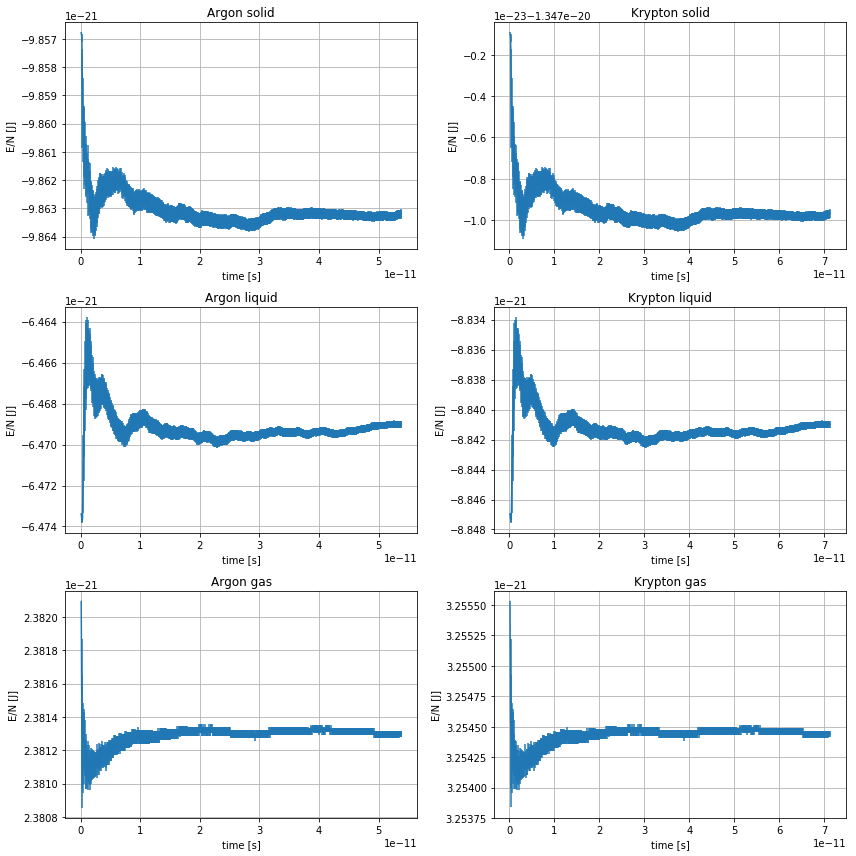

In [40]:
plt.figure(figsize=(12,12))

# solid phase

x, y, err = np.loadtxt("data/solid/ave_etot.out", usecols=(0,1,2), unpack='true')

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,1)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon solid")
plt.xlabel('time [s]')
plt.ylabel('E/N [J]')
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton solid")
plt.xlabel('time [s]')
plt.ylabel('E/N [J]')
plt.grid(True)

#liquid phase

x, y, err = np.loadtxt("data/liquid/ave_etot.out", usecols=(0,1,2), unpack='true')

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,3)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon liquid")
plt.xlabel('time [s]')
plt.ylabel('E/N [J]')
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton liquid")
plt.xlabel('time [s]')
plt.ylabel('E/N [J]')
plt.grid(True)

# gas phase

x, y, err = np.loadtxt("data/gas/ave_etot.out", usecols=(0,1,2), unpack='true')

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,5)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon gas")
plt.xlabel('time [s]')
plt.ylabel('E/N [J]')
plt.grid(True)

plt.subplot(3,2,6)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton gas")
plt.xlabel('time [s]')
plt.ylabel('E/N [J]')
plt.grid(True)

plt.tight_layout()
plt.show()

### Potential energy per particle

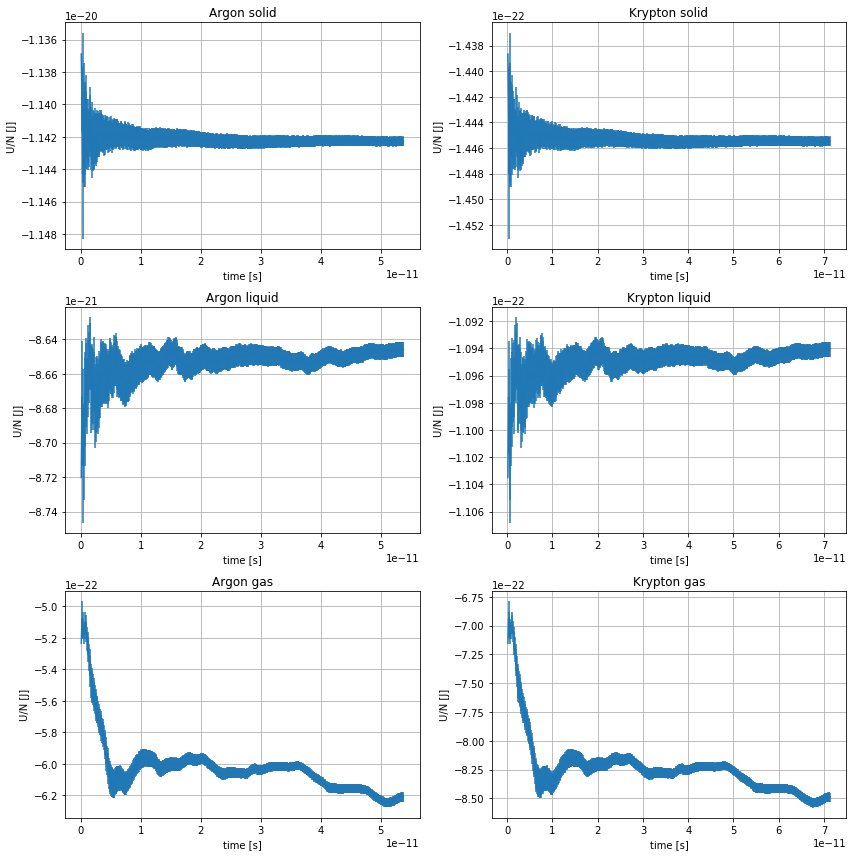

In [41]:
plt.figure(figsize=(12,12))

# solid phase

x, y, err = np.loadtxt("data/solid/ave_epot.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy/npart
err_kr=err*kr_energy/npart

plt.subplot(3,2,1)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon solid")
plt.xlabel('time [s]')
plt.ylabel('U/N [J]')
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton solid")
plt.xlabel('time [s]')
plt.ylabel('U/N [J]')
plt.grid(True)

#liquid phase

x, y, err = np.loadtxt("data/liquid/ave_epot.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy/npart
err_kr=err*kr_energy/npart

plt.subplot(3,2,3)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon liquid")
plt.xlabel('time [s]')
plt.ylabel('U/N [J]')
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton liquid")
plt.xlabel('time [s]')
plt.ylabel('U/N [J]')
plt.grid(True)

# gas phase

x, y, err = np.loadtxt("data/gas/ave_epot.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,5)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon gas")
plt.xlabel('time [s]')
plt.ylabel('U/N [J]')
plt.grid(True)

plt.subplot(3,2,6)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton gas")
plt.xlabel('time [s]')
plt.ylabel('U/N [J]')
plt.grid(True)

plt.tight_layout()
plt.show()

### Kinetic energy  per particle

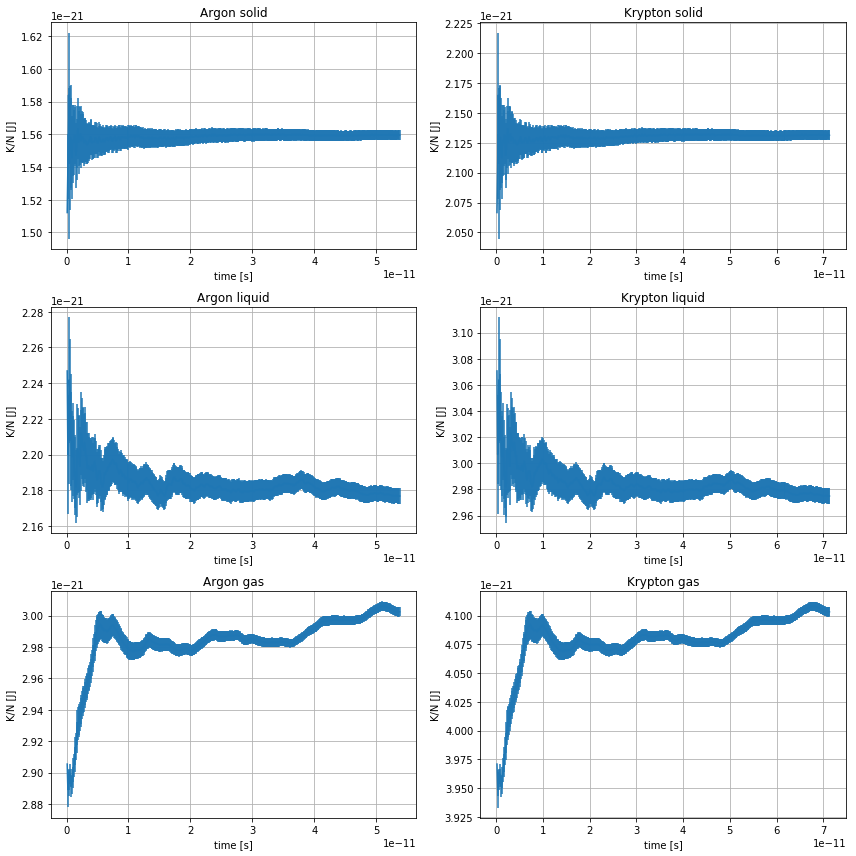

In [42]:
plt.figure(figsize=(12,12))

# solid phase

x, y, err = np.loadtxt("data/solid/ave_ekin.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,1)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon solid")
plt.xlabel('time [s]')
plt.ylabel('K/N [J]')
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton solid")
plt.xlabel('time [s]')
plt.ylabel('K/N [J]')
plt.grid(True)

#liquid phase

x, y, err = np.loadtxt("data/liquid/ave_ekin.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,3)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon liquid")
plt.xlabel('time [s]')
plt.ylabel('K/N [J]')
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton liquid")
plt.xlabel('time [s]')
plt.ylabel('K/N [J]')
plt.grid(True)

# gas phase

x, y, err = np.loadtxt("data/gas/ave_ekin.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy
err_ar=err*ar_energy

x_kr=x*kr_time_step
y_kr=y*kr_energy
err_kr=err*kr_energy

plt.subplot(3,2,5)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon gas")
plt.xlabel('time [s]')
plt.ylabel('K/N [J]')
plt.grid(True)

plt.subplot(3,2,6)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton gas")
plt.xlabel('time [s]')
plt.ylabel('K/N [J]')
plt.grid(True)

plt.tight_layout()
plt.show()

### Temperature

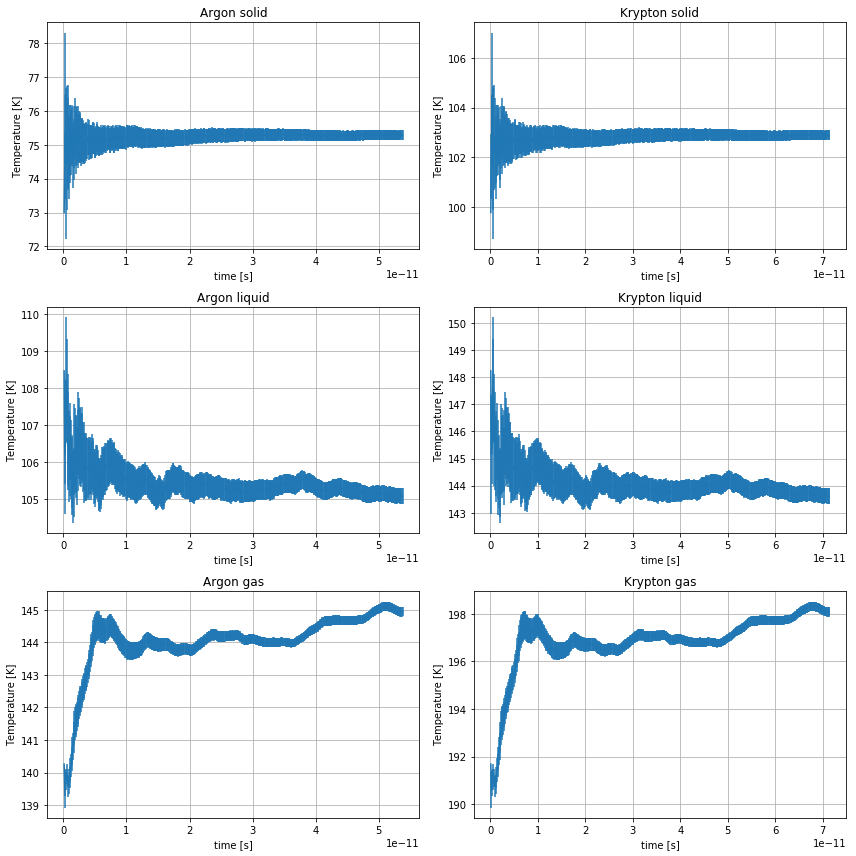

In [43]:
plt.figure(figsize=(12,12))

# solid phase

x, y, err = np.loadtxt("data/solid/ave_temp.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy/kb
err_ar=err*ar_energy/kb

x_kr=x*kr_time_step
y_kr=y*kr_energy/kb
err_kr=err*kr_energy/kb

plt.subplot(3,2,1)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon solid")
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton solid")
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')
plt.grid(True)

#liquid phase

x, y, err = np.loadtxt("data/liquid/ave_temp.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy/kb
err_ar=err*ar_energy/kb

x_kr=x*kr_time_step
y_kr=y*kr_energy/kb
err_kr=err*kr_energy/kb

plt.subplot(3,2,3)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon liquid")
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton liquid")
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')
plt.grid(True)

# gas phase

x, y, err = np.loadtxt("data/gas/ave_temp.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_energy/kb
err_ar=err*ar_energy/kb

x_kr=x*kr_time_step
y_kr=y*kr_energy/kb
err_kr=err*kr_energy/kb

plt.subplot(3,2,5)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon gas")
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')
plt.grid(True)

plt.subplot(3,2,6)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton gas")
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')
plt.grid(True)

plt.tight_layout()
plt.show()

### Pressure

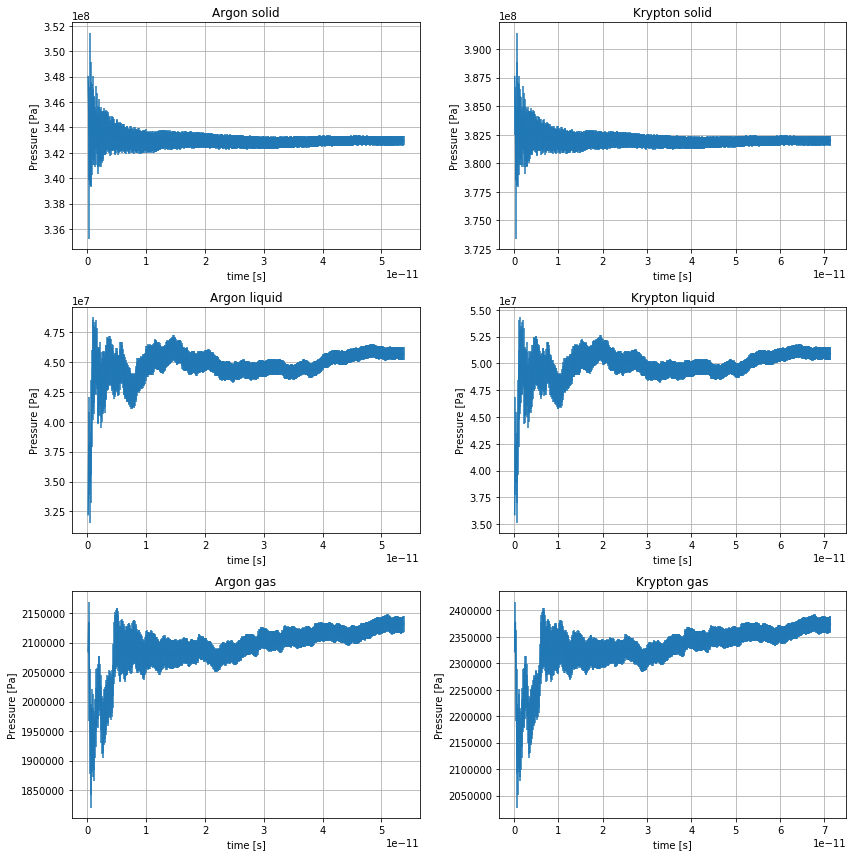

In [44]:
plt.figure(figsize=(12,12))

# solid phase

x, y, err = np.loadtxt("data/solid/ave_pres.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_pres
err_ar=err*ar_pres

x_kr=x*kr_time_step
y_kr=y*kr_pres
err_kr=err*kr_pres

plt.subplot(3,2,1)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon solid")
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.grid(True)

plt.subplot(3,2,2)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton solid")
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.grid(True)

#liquid phase

x, y, err = np.loadtxt("data/liquid/ave_pres.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_pres
err_ar=err*ar_pres

x_kr=x*kr_time_step
y_kr=y*kr_pres
err_kr=err*kr_pres

plt.subplot(3,2,3)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon liquid")
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.grid(True)

plt.subplot(3,2,4)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton liquid")
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.grid(True)

# gas phase

x, y, err = np.loadtxt("data/gas/ave_pres.out", usecols=(0,1,2), unpack=True)

x_ar=x*ar_time_step
y_ar=y*ar_pres
err_ar=err*ar_pres

x_kr=x*kr_time_step
y_kr=y*kr_pres
err_kr=err*kr_pres

plt.subplot(3,2,5)
plt.errorbar(x_ar,y_ar,yerr=err_ar)
plt.title("Argon gas")
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.grid(True)

plt.subplot(3,2,6)
plt.errorbar(x_kr,y_kr,yerr=err_kr)
plt.title("Krypton gas")
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.grid(True)

plt.tight_layout()
plt.show()